# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
# import plotly.graph_objects as go
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import import_ipynb
# import services.lista_estados_regioes as ler
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Pré-processamento

In [2]:
dataset = pd.read_csv('dataset_poscomp.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [3]:
dataset.head()

,DATA NASC.,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao
0,29/11/1989,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,...,0.0,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0
1,23/02/1995,1,20,4,metodologia e técnicas da computação,3.0,2.0,3.0,2.0,2.0,...,0.0,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0
2,13/12/1991,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0
3,29/09/1986,1,13,0,modelagem e gerência de sistemas de informação,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0
4,26/12/1997,0,3,0,"computação gráfica, imagens e visualização",0.0,0.0,2.0,2.0,1.0,...,0.0,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DATA NASC.                                       10977 non-null  object 
 1   SEXO                                             10977 non-null  int64  
 2   ESTADO                                           10977 non-null  int64  
 3   REGIAO                                           10977 non-null  int64  
 4   ESPECIALIDADE                                    10977 non-null  object 
 5   Matemática Discreta                              10977 non-null  float64
 6   Cálculo Diferencial e Integral                   10977 non-null  float64
 7   Álgebra Linear                                   10977 non-null  float64
 8   Geometria Analítica                              10977 non-null  float64
 9   Análise Combinatória        

In [5]:
dataset.dropna() # Eliminar valores nulos

,DATA NASC.,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao
0,29/11/1989,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,...,0.0,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0
1,23/02/1995,1,20,4,metodologia e técnicas da computação,3.0,2.0,3.0,2.0,2.0,...,0.0,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0
2,13/12/1991,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0
3,29/09/1986,1,13,0,modelagem e gerência de sistemas de informação,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0
4,26/12/1997,0,3,0,"computação gráfica, imagens e visualização",0.0,0.0,2.0,2.0,1.0,...,0.0,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,17/01/1997,0,12,3,inteligência artificial,3.0,2.0,3.0,3.0,1.0,...,1.0,2.0,1.0,1.0,1.0,0.0,1.0,14.0,16.0,8.0
10973,04/09/1971,1,14,1,redes de computadores e sistemas distribuidos,1.0,1.0,2.0,2.0,0.0,...,1.0,0.0,2.0,1.0,0.0,1.0,1.0,10.0,16.0,9.0
10974,08/07/1995,1,24,3,"engenharia de software, gerenciamento de infor...",1.0,2.0,1.0,3.0,0.0,...,0.0,2.0,1.0,1.0,0.0,1.0,2.0,9.0,18.0,8.0
10975,10/01/1994,1,7,3,inteligência computacional,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,10.0,16.0,6.0


## Trabalhar com as linhas de pesquisa

In [6]:
import re

# definir uma expressão regular para encontrar os caracteres '?'
def substituir_caracteres(df, caractere):
    regex = r'\b{}\b'.format(re.escape(caractere))

    # substituir os caracteres '?' por um caractere vazio em todas as linhas da coluna 'Texto'
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].apply(lambda x: re.sub(regex, '', x))
    
    return df

In [7]:
def substituir_palavras(df, palavras_a_substituir, palavra_substituta):
    '''
    Substitui uma sequência de duas ou mais palavras por uma única palavra em um DataFrame do Pandas usando métodos.
    
    Parâmetros:
        df: DataFrame - o DataFrame contendo as palavras a serem substituídas.
        palavras_a_substituir: list - uma lista de palavras que serão substituídas por uma única palavra.
        palavra_substituta: str - a palavra que será usada para substituir a sequência de palavras.
        
    Retorna:
        DataFrame - um novo DataFrame com as palavras substituídas.
    '''
    # cria uma cópia do DataFrame para evitar a modificação do DataFrame original
    # df_novo = df.copy()
    
    # substitui as duas palavras por uma usando o método replace()
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].replace(palavras_a_substituir, palavra_substituta, regex=True)
    
    # retorna o novo DataFrame com as palavras substituídas
    return df

In [8]:
dataset = substituir_caracteres(dataset, '?')
dataset = substituir_caracteres(dataset, '\\')
dataset = substituir_caracteres(dataset, '\ ')

In [9]:
# buscando as três primeiras palavras de cada texto sem as vírgulas
primeiras_palavras = dataset['ESPECIALIDADE'].str.split().apply(lambda x: x[:3])

# adicionando as palavras como uma nova coluna no dataframe
dataset['ESPECIALIDADE'] = primeiras_palavras

# removendo as vírgulas da coluna 'Primeiras Palavras'
dataset['ESPECIALIDADE'] = dataset['ESPECIALIDADE'].apply(lambda x: ' '.join(word.replace(',', '') for word in x))

# imprimindo o dataframe resultante

In [10]:
# # substituir as palavras por uma chamando a função substituir_palavras()
dataset = substituir_palavras(dataset, ['aprendizagem de máquinas','aprendizagem de ma?quina', 'aprendizagem de máquina','aprendizado de maquina'], 'aprendizado de máquina')
# dataset_analise = substituir_palavras(dataset_analise, ['?'], '')
dataset = substituir_palavras(dataset, ['computacao evolucionaria aprendizagem','computacão evolucionária aprendizagem'], 'computação evolucionária aprendizagem')
dataset = substituir_palavras(dataset, ['engenharia de tráfego','engenharia de trafego'], 'engenharia de tráfego')
dataset = substituir_palavras(dataset, ['inteligência artificial', 'inteligência artificial e','inteligência computacional e'], 'inteligência artificial')
dataset = substituir_palavras(dataset, ['sistemas distribuidos', 'sistemas distribuídos', 'sistemas distribuídos e', 'algoritmos distribuídos'], 'sistemas distribuídos')
dataset = substituir_palavras(dataset, ['redes de comunicação', 'redes de comunicações'], 'redes de comunicações')
dataset = substituir_palavras(dataset, ['processamento gráfico','computação gráfica processamento','processamento gráfico interação',
                                                       'processamento gráfico e','processamento gráfico aplicado','processamento grafico'], 'redes de comunicações')

In [11]:
dataset = substituir_palavras(dataset, ['sistemas embarcados e',
 'sistemas embarcados',
 'sistemas embarcados evoluídos',
 'sistemas computacionais embarcados',
 'velha-sistemas embarcados e','sistemas embarcadosvoluídos',
 'velha-sistemas embarcados'], 'sistemas embarcados')

In [12]:
dataset = substituir_palavras(dataset,['visão computacional',
 'visão computacional reconhecimento',
 'visão computacional.',
 'visão computacional e',
 'visão computacional realidade','visão computacionalrealidade',
                                                      'visão computacionalealidade'], 'visão computacional')

In [13]:
dataset = substituir_palavras(dataset, ['banco de dados','bancos de dados','banco de dados/computação'], 'banco de dados')
dataset = substituir_palavras(dataset, ['mineração de dados','mineiração de dados'], 'mineração de dados')
dataset = substituir_palavras(dataset, ['inteligência computacional', 'inteligência artificial','inteligencia computacional',
                                        'inteligencia artificial','lógica inteligência artificial',
                                       'computação aplicadainteligência artificial','outrasinteligência artificial'], 'inteligência artificial')
dataset = substituir_palavras(dataset,['engenharia de software:'], 'engenharia de software')
dataset = substituir_palavras(dataset,['ciência dos dados','ciência de dados'], 'ciência de dados')
dataset = substituir_palavras(dataset,['ciência computacional','ciência da computação','ciências de computação'], 'ciência da computação')
dataset = substituir_palavras(dataset,['sistemas de computaçãoarquitetura', 'sistemas de computaçãosistemas',
                                       'sistemas de computaçãovisualização'], 'sistemas de computação')
dataset = substituir_palavras(dataset,['computação aplicada', 'computação aplicada a','computação aplicadasistemas de',
                                       'computação aplicada'], 'computação aplicada')
dataset = substituir_palavras(dataset,['computação gráfica imagens', 'computação gráfica'], 'computação gráfica')

In [14]:
f = dataset[dataset['ESPECIALIDADE'].str.contains('gráfica')]
f['ESPECIALIDADE'].sort_values().value_counts()
list(f['ESPECIALIDADE'].unique())

['computação gráfica']

In [15]:
especialidades = dataset['ESPECIALIDADE'].value_counts()[:9]
especialidades = pd.DataFrame(especialidades)
especialidades

,ESPECIALIDADE
inteligência artificial,1699
engenharia de software,1586
sistemas de computação,582
sistemas de informação,527
redes de computadores,387
banco de dados,358
computação aplicada,348
ciência da computação,258
aprendizado de máquina,229


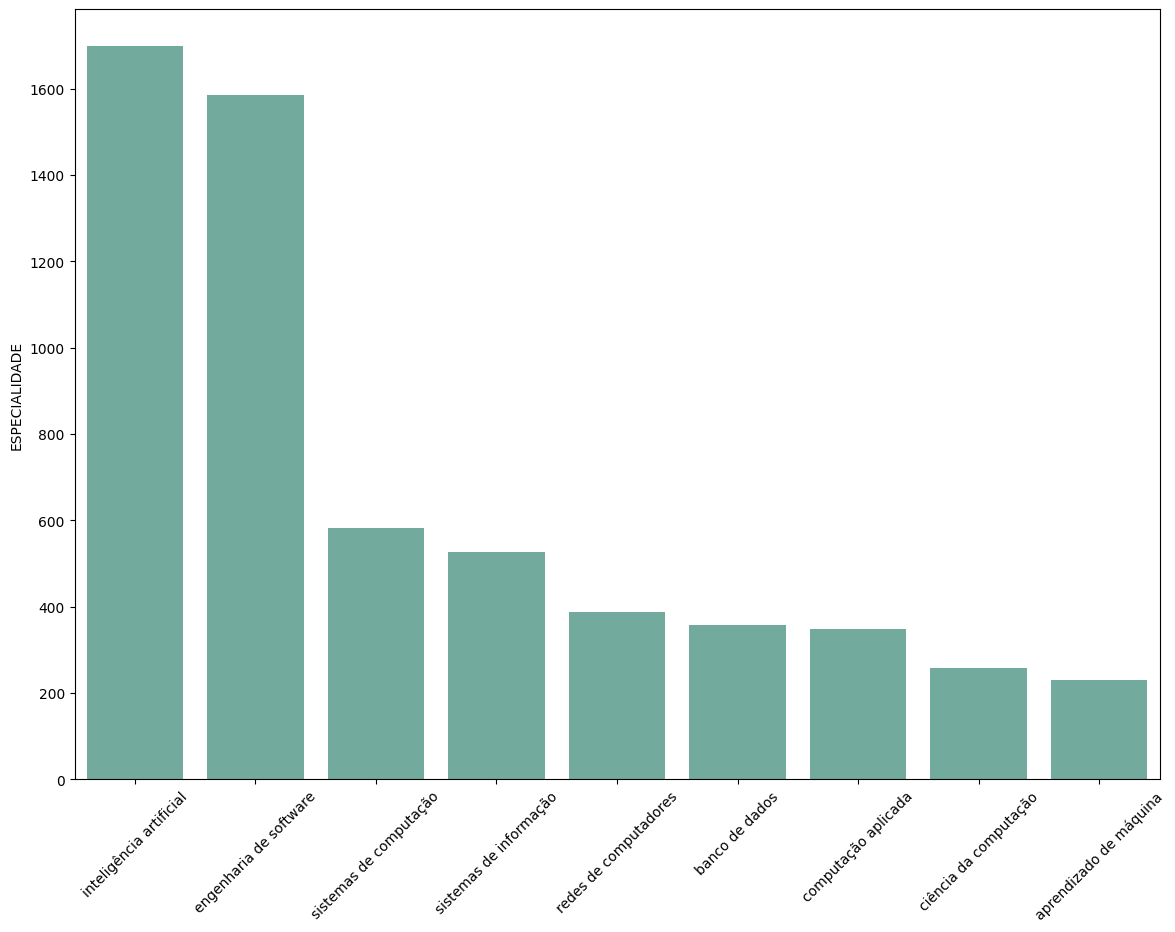

In [16]:
plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot(
    y="ESPECIALIDADE", 
    x=especialidades.index, 
    data=especialidades, 
    color='#69b3a2', 
);
plt.xticks(rotation=45);
plt.savefig('espec.png', dpi = 300, bbox_inches='tight')

## Aplicações de algoritmos de aprendizado de máquina

In [17]:
dataset.head()

,DATA NASC.,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao
0,29/11/1989,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,...,0.0,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0
1,23/02/1995,1,20,4,metodologia e técnicas,3.0,2.0,3.0,2.0,2.0,...,0.0,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0
2,13/12/1991,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0
3,29/09/1986,1,13,0,modelagem e gerência,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0
4,26/12/1997,0,3,0,computação gráfica,0.0,0.0,2.0,2.0,1.0,...,0.0,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0


In [18]:
X_dataset = dataset.loc[:,['matematica', 'fundamentos_computacao','tecnologia_computacao']]

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
X_dataset = min_max_scaler.fit_transform(X_dataset)
X_dataset

array([[0.7       , 0.75      , 0.55555556],
       [0.8       , 0.78571429, 0.66666667],
       [0.2       , 0.57142857, 0.44444444],
       ...,
       [0.45      , 0.64285714, 0.44444444],
       [0.5       , 0.57142857, 0.33333333],
       [0.65      , 0.60714286, 0.27777778]])

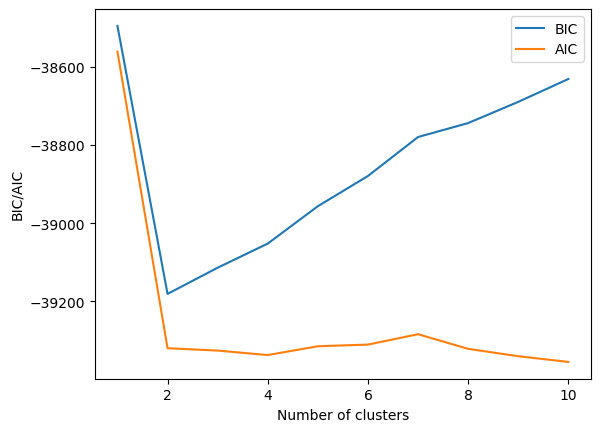

In [20]:
# Plotar BIC/AIC para encontrar o número de cluster
from sklearn.mixture import GaussianMixture

# Crie uma lista vazia para armazenar os valores BIC e AIC
bic_values = []
aic_values = []

# Teste diferentes valores de k
for k in range(1, 11):
    # Crie um modelo GaussianMixture com o número atual de clusters
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_dataset)
    
    # Armazena os valores BIC e AIC
    bic_values.append(gmm.bic(X_dataset))
    aic_values.append(gmm.aic(X_dataset))

# Plot BIC x k
plt.plot(range(1, 11), bic_values, label="BIC")
# Plot AIC x k
plt.plot(range(1, 11), aic_values, label="AIC")
plt.xlabel('Number of clusters')
plt.ylabel('BIC/AIC')
plt.legend()
plt.show()

### Aplicação K-means

In [21]:
kmeans_poscomp = KMeans(n_clusters=2, n_init=4, random_state=0, init='k-means++', max_iter=300)
rotulos_kmeans = kmeans_poscomp.fit_predict(X_dataset)
# dataset['Grupo'] = model.predict(X_dataset)
# dataset.head()

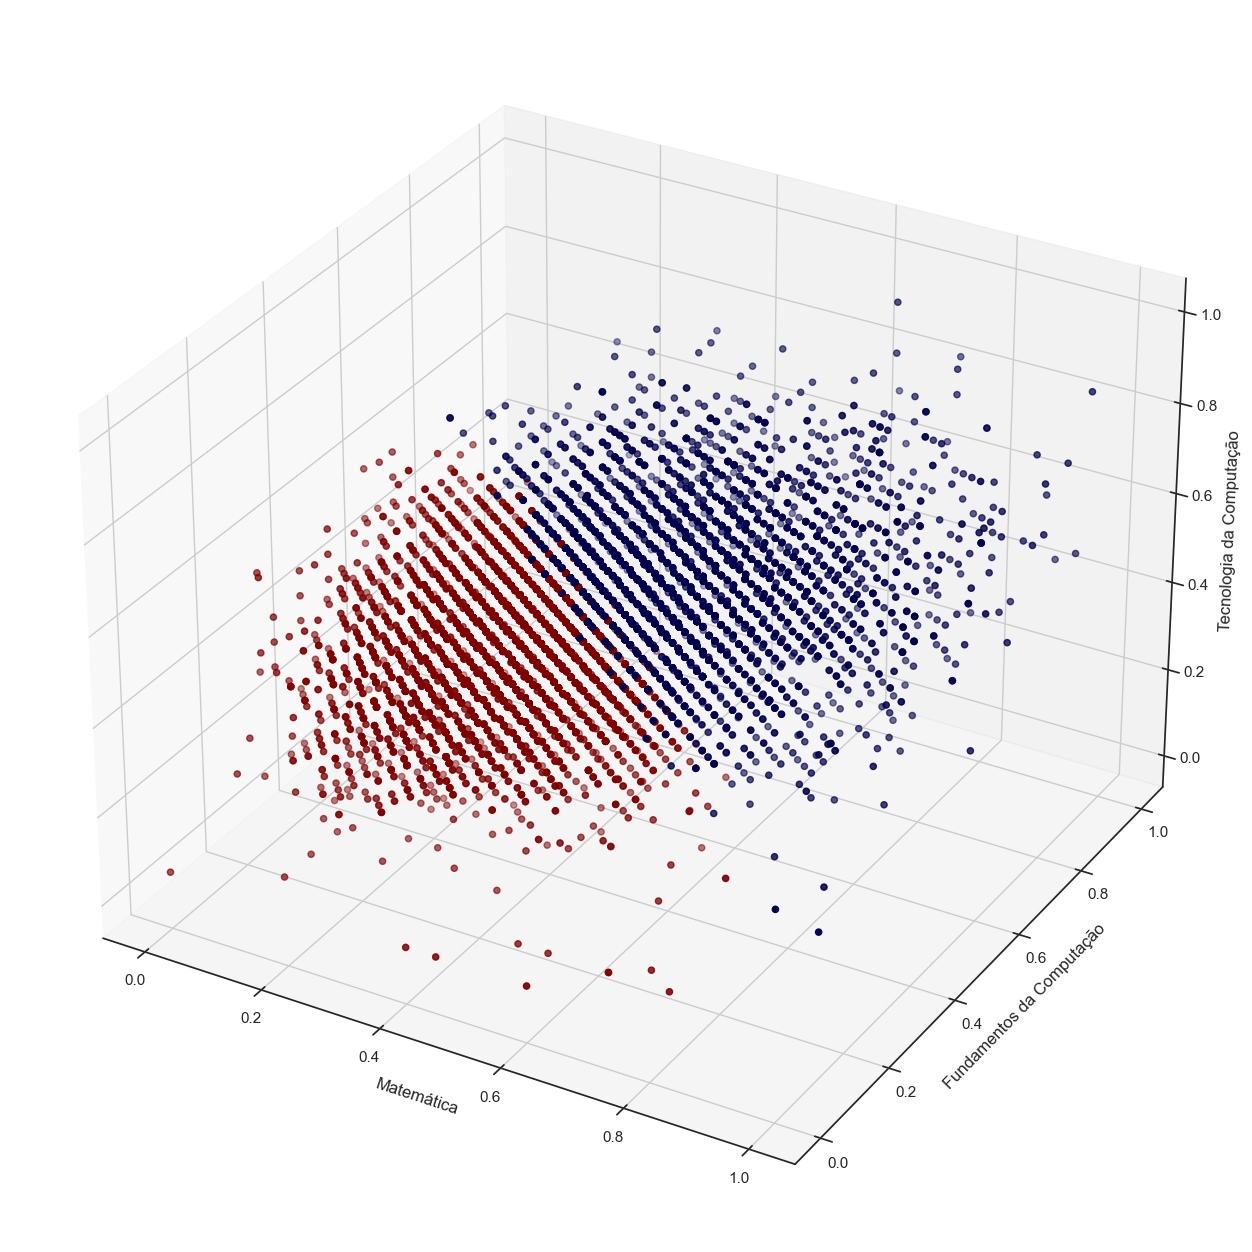

In [22]:
sns.set_theme(style="ticks")
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = '3d')
sctt= ax.scatter3D(X_dataset[:,0], X_dataset[:,1], X_dataset[:,2], c = rotulos_kmeans, cmap='seismic')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fundamentos da Computação')
ax.set_zlabel('Tecnologia da Computação')
plt.savefig('imagens/grafico_kmeans.png', dpi = 300, bbox_inches='tight')

In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

# Calcular a pontuação Silhouette
silhouette_score_kmeans = silhouette_score(X_dataset, kmeans_poscomp.labels_)
print(silhouette_score_kmeans)

# Calcular o índice Calinski-Harabasz
calinski_harabasz_score_kmeans = calinski_harabasz_score(X_dataset, kmeans_poscomp.labels_)
print(calinski_harabasz_score_kmeans)

# Calcular o índice Davies-Bouldin
davies_bouldin_score_kmeans = davies_bouldin_score(X_dataset, kmeans_poscomp.labels_)
print(davies_bouldin_score_kmeans)


0.3332831326236632
7051.250147403916
1.1416345735020383


### Agrupamento hierarquico

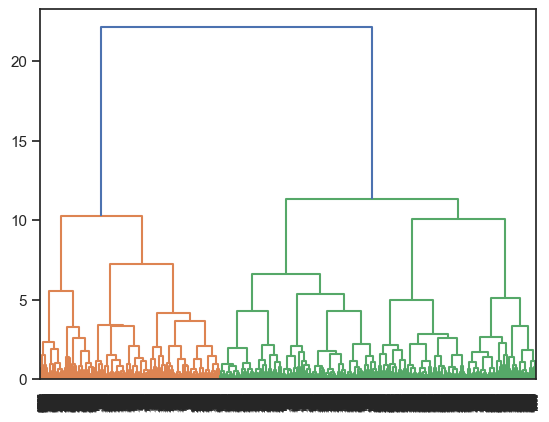

In [24]:
dendrograma = dendrogram(linkage(X_dataset, method = 'ward'))

In [25]:
hc_poscomp = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage = 'ward')
rotulos_hc = hc_poscomp.fit_predict(X_dataset)

In [26]:
rotulos_hc

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

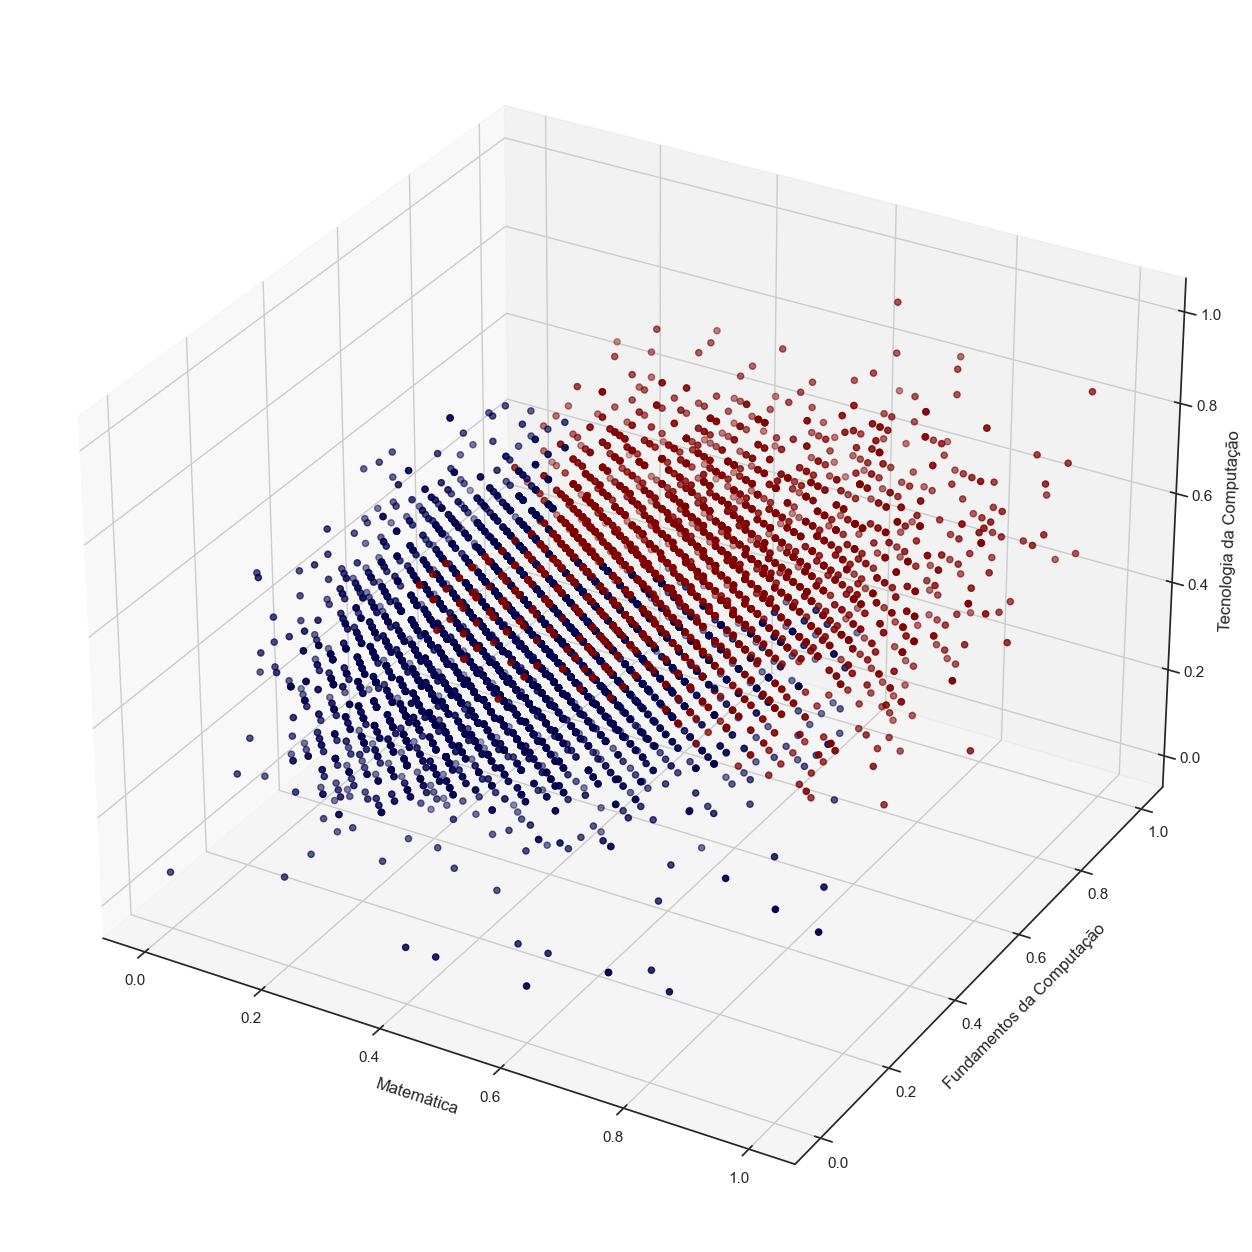

In [27]:
sns.set_theme(style="ticks")
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = '3d')
sctt= ax.scatter3D(X_dataset[:,0], X_dataset[:,1], X_dataset[:,2], c = rotulos_hc, cmap='seismic')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fundamentos da Computação')
ax.set_zlabel('Tecnologia da Computação')
plt.savefig('imagens/grafico_hc.png', dpi = 300, bbox_inches='tight')

In [28]:
# Calcular a pontuação Silhouette
silhouette_score_agglomerative = silhouette_score(X_dataset, hc_poscomp.labels_)
print(silhouette_score_agglomerative)

# Calcular o índice Calinski-Harabasz
calinski_harabasz_score_agglomerative = calinski_harabasz_score(X_dataset, hc_poscomp.labels_)
print(calinski_harabasz_score_agglomerative)

# Calcular o índice Davies-Bouldin
davies_bouldin_score_agglomerative = davies_bouldin_score(X_dataset, hc_poscomp.labels_)
print(davies_bouldin_score_agglomerative)

0.3033840863498831
5761.933699562386
1.2183273919513826


### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

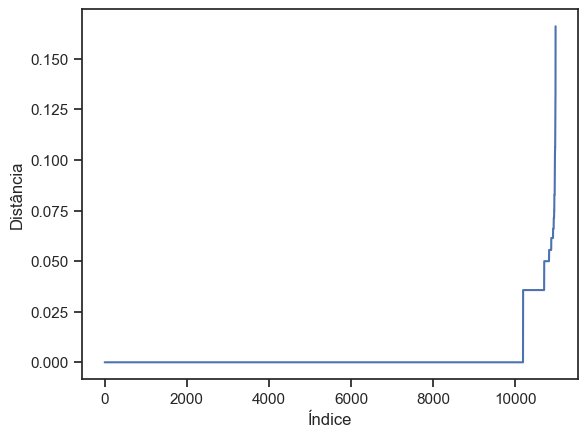

In [30]:
from sklearn.neighbors import NearestNeighbors

# Encontrar a distância média entre os pontos
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_dataset)
distances, indices = nbrs.kneighbors(X_dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# Traçar o gráfico do vizinho mais próximo (k-NN)
plt.ylabel('Distância')
plt.xlabel('Índice')
plt.show()


In [31]:
dbscan_poscomp = DBSCAN(eps=0.050, min_samples=120)
rotulos_dbscan = dbscan_poscomp.fit_predict(X_dataset)

In [32]:
rotulos_dbscan = dbscan_poscomp.labels_
rotulos_dbscan

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [33]:
np.unique(rotulos_dbscan, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([9836,  382,  122,  288,  211,   65,   73], dtype=int64))

In [34]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(rotulos_dbscan)) - (1 if -1 in rotulos_dbscan else 0)
n_noise_ = list(rotulos_dbscan).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 9836


In [35]:
# Calcular a pontuação Silhouette
silhouette_score_dbscan = silhouette_score(X_dataset, rotulos_dbscan)
print(silhouette_score_dbscan)

# Calcular o índice Davies-Bouldin
davies_bouldin_score_dbscan = davies_bouldin_score(X_dataset, rotulos_dbscan)
print(davies_bouldin_score_dbscan)

-0.4072851705646952
4.730586554787613
